# Breast_Cancer_Wisconsin_Diagnostic

Breast cancer, one of the most malignant types of cancers, has been seriously threatening both the physical and mental health of women in the world. However, this is curable if detected in an early-stage as a non-metastatic disease thus underlying the importance of early detection and need to conduct research in these lines. The Breast Cancer Wisconsin (Diagnostic) Dataset gives an opportunity to apply Machine learning techniques in such a research process. An important step before deploying any Machine Learning algorithm is to study the characteristics of the given dataset, commonly called Exploratory Data Analysis (EDA).

## Introduction:

Diagnosis of breast cancer is traditionally done by a full biopsy which is an invasive surgical method. A less invasive method called Fine Needle Biopsy (FNB), allows for examination of a small amount of tissue from the tumor.

This dataset was obtained by analyzing the cell nuclei characteristics of 569 images obtained by Fine Needle Aspiration of the breast mass. Each of the images are classified(diagnosed) as being “Benign” or “Malignant”.

Structural Analysis: Before we look into the content of the data, we first need to look into the general structure of the data , i.e., the number of rows (data points)and number of columns (features) in it.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline


In [14]:
data = pd.read_csv("Wisconsin Breast Cancer dataset CSV.csv")
 
print("Total data points",data.shape[0])
print("Total number of features(as number of columns) are ", 
data.shape[1])
data.describe()

Total data points 569
Total number of features(as number of columns) are  32


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


There were ten real-valued features are computed for each cell nucleus :

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter² / area — 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (“coastline approximation” — 1)

In [17]:
#Check for null values
null_values = data.isnull().values.any()
if null_values == True:
    print("There are some missing values in data")
else:
    print("There are no missing values in the dataset")

There are no missing values in the dataset


## Data Preprocessing: 
The column “diagnosis” has two values: Malignant and Benign. Machine learning models can be built on data that is made of just numbers. Hence, we will replace Malignant with number 1 and Benign with number 0. Any two numbers can be used but 0 and 1 are the most commonly used for classification purposes. Once replaced, the code df.diagnosis.unique() will serve as a check to that we get a resulting column of numbers 1 and 0.

In [19]:
#Replace M with 1 and Begnin with 0 (else 0)
print("Malignant = 1, Benign = 0")
data["diagnosis"]= data["diagnosis"].map(lambda row: 1 if row=='M' else 0)
data.head()

Malignant = 1, Benign = 0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Analysis 

In [21]:
print("The unique number of data values are")
data.nunique()

The unique number of data values are


diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

## Extracting Mean, Squared Error, and Worst Features

In [29]:
data_mean = data[data.columns[:11]]
data_se = data.drop(data.columns[1:11], axis=1)
data_se = data_se.drop(data_se.columns[11:], axis=1)
data_worst = data.drop(data.columns[1:21], axis=1)

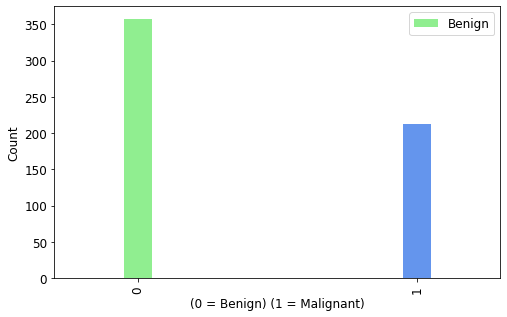

In [31]:
#Count Based On Diagnosis:
data.diagnosis.value_counts() \
    .plot(kind="bar", width=0.1, color=["lightgreen", "cornflowerblue"], legend=1, figsize=(8, 5))
plt.xlabel("(0 = Benign) (1 = Malignant)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12)
plt.legend(["Benign"], fontsize=12)
plt.show()

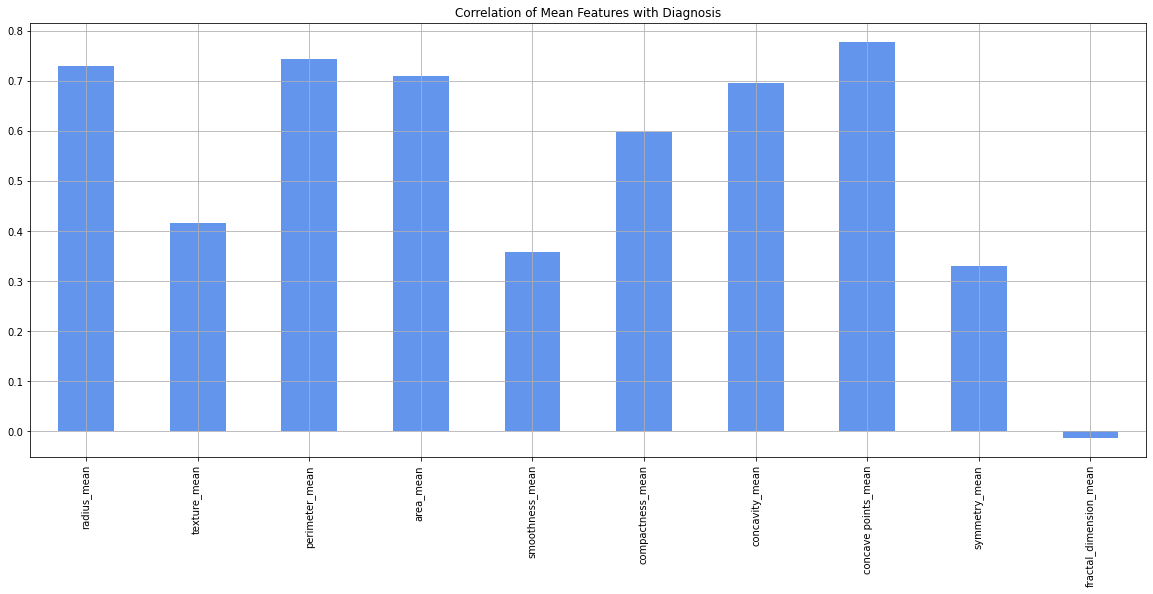

In [34]:
#Correlation of Mean Features with Diagnosis:

plt.figure(figsize=(20, 8))
data_mean.drop('diagnosis', axis=1).corrwith(data_mean.diagnosis).plot(kind='bar', grid=True, title="Correlation of Mean Features with Diagnosis", color="cornflowerblue");

>Fractal_dimension_mean least correlated with the target variable
>
>All other mean features have a significant correlation with the target variable

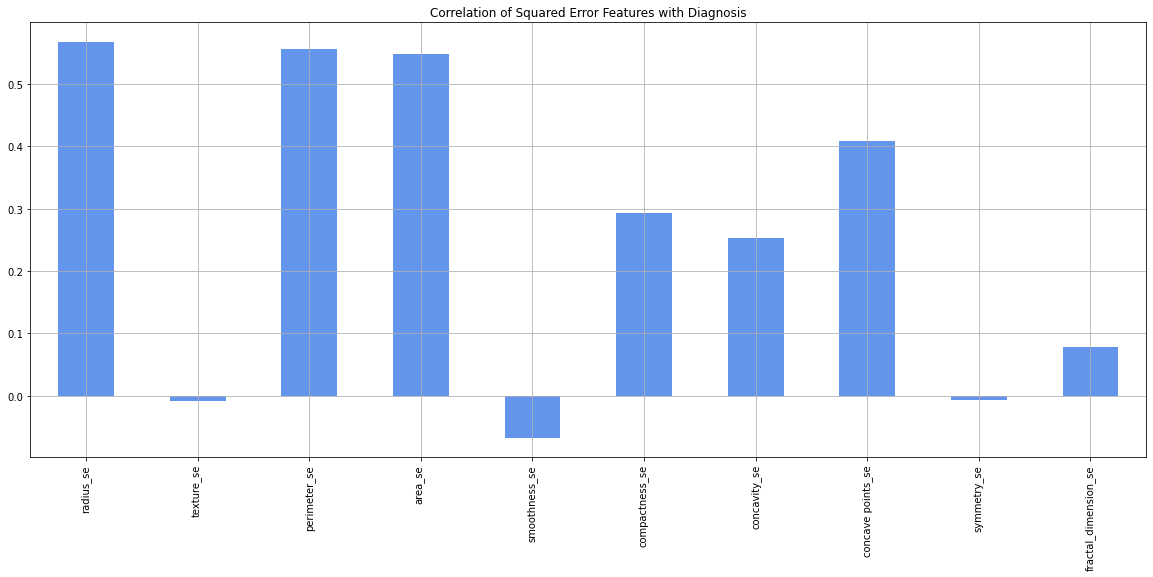

In [37]:
#Correlation of Squared Error Features with Diagnosis:
plt.figure(figsize=(20, 8))
data_se.drop('diagnosis', axis=1).corrwith(data_se.diagnosis).plot(kind='bar', grid=True, title="Correlation of Squared Error Features with Diagnosis", color="cornflowerblue");


>Texture_se, smoothness_se, symmetry_se, and fractal_dimension_se are least correlated with the target variable
>
>All other squared error features have a significant correlation with the target variable

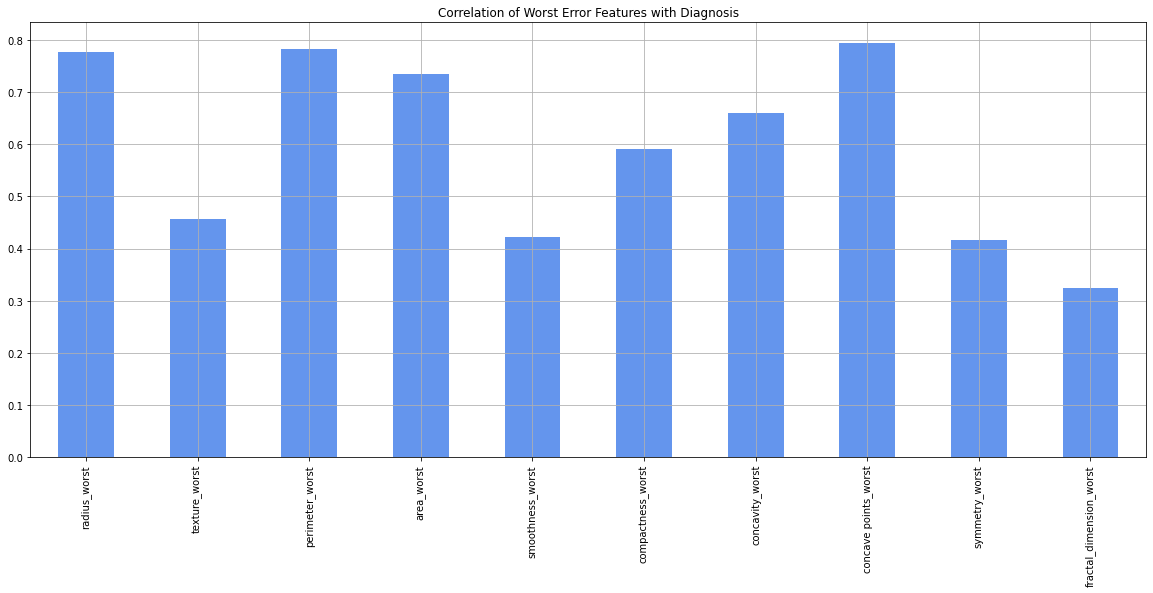

In [39]:
#Correlation of Worst Features with Diagnosis:

plt.figure(figsize=(20, 8))
data_worst.drop('diagnosis', axis=1).corrwith(data_worst.diagnosis).plot(kind='bar', grid=True, title="Correlation of Worst Error Features with Diagnosis", color="cornflowerblue");

>All worst features have a significant correlation with the target variable

In [40]:
#Extracting Mean, Squared Error, and Worst Features columns

data_mean_cols = list(data.columns[1:11])
data_se_cols = list(data.columns[11:21])
data_worst_cols = list(data.columns[21:])

In [41]:
#Split into two Parts Based on Diagnosis

dfM = data[data['diagnosis'] == 1]
dfB = data[data['diagnosis'] == 0]

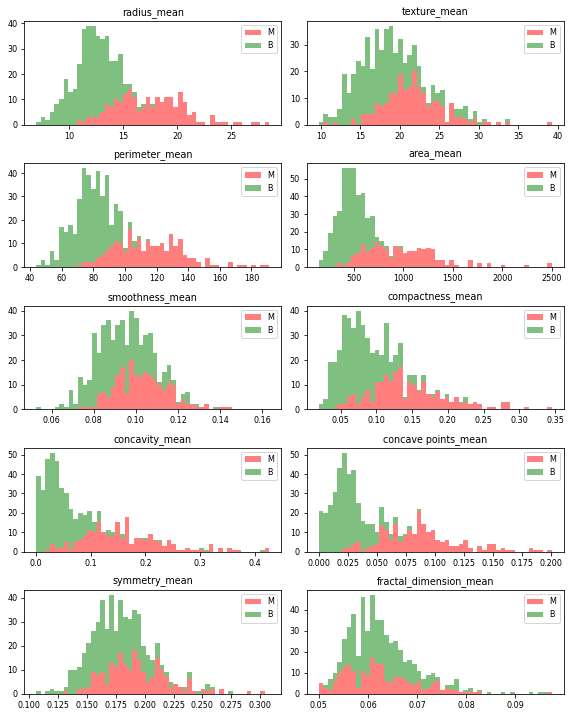

In [46]:
#Mean Features vs Diagnosis:

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(data[data_mean_cols[idx]]) - min(data[data_mean_cols[idx]])) / 50
    ax.hist([dfM[data_mean_cols[idx]], dfB[data_mean_cols[idx]]],
            bins=np.arange(min(data[data_mean_cols[idx]]), max(data[data_mean_cols[idx]]) + binwidth, binwidth), alpha=0.5,
            stacked=True, label=['M', 'B'], color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(data_mean_cols[idx])
plt.tight_layout()
plt.show()

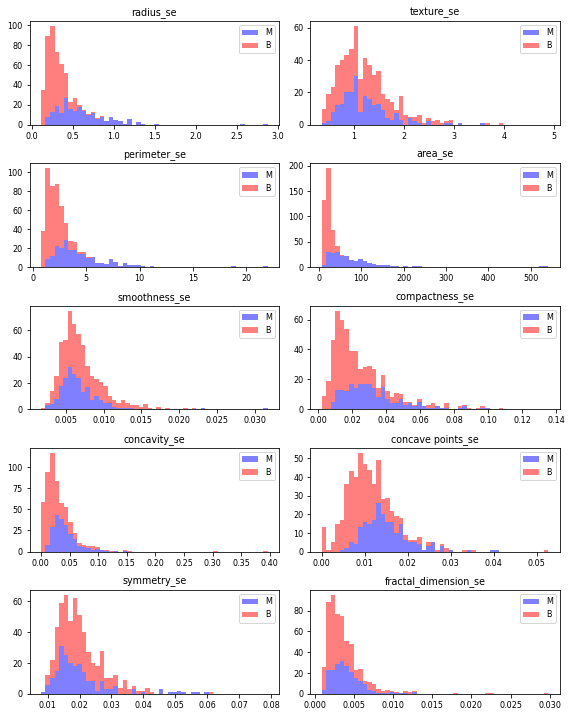

In [49]:
#Squared Error Features vs Diagnosis:

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(data[data_se_cols[idx]]) - min(data[data_se_cols[idx]])) / 50
    ax.hist([dfM[data_se_cols[idx]], dfB[data_se_cols[idx]]],
            bins=np.arange(min(data[data_se_cols[idx]]), max(data[data_se_cols[idx]]) + binwidth, binwidth), alpha=0.5,
            stacked=True, label=['M', 'B'], color=['b', 'r'])
    ax.legend(loc='upper right')
    ax.set_title(data_se_cols[idx])
plt.tight_layout()
plt.show()

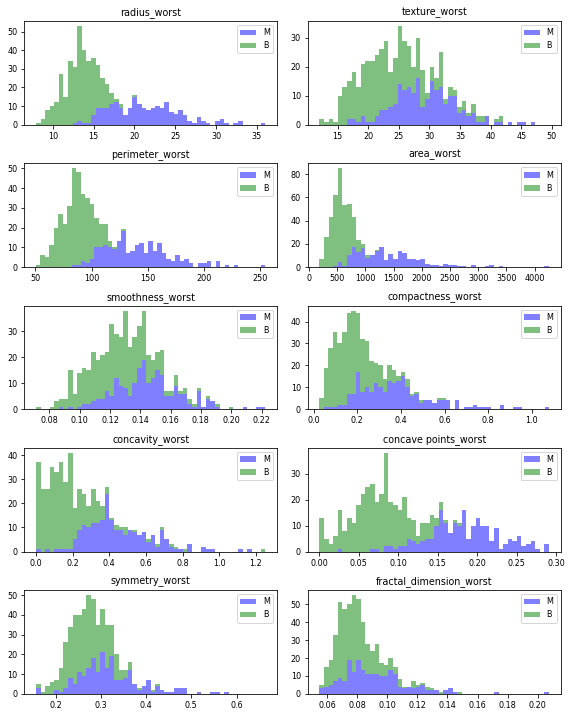

In [51]:
#Worst Features vs Diagnosis:

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.figure
    binwidth = (max(data[data_worst_cols[idx]]) - min(data[data_worst_cols[idx]])) / 50
    ax.hist([dfM[data_worst_cols[idx]], dfB[data_worst_cols[idx]]],
            bins=np.arange(min(data[data_worst_cols[idx]]), max(data[data_worst_cols[idx]]) + binwidth, binwidth), alpha=0.5,
            stacked=True, label=['M', 'B'], color=['b', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(data_worst_cols[idx])
plt.tight_layout()
plt.show()

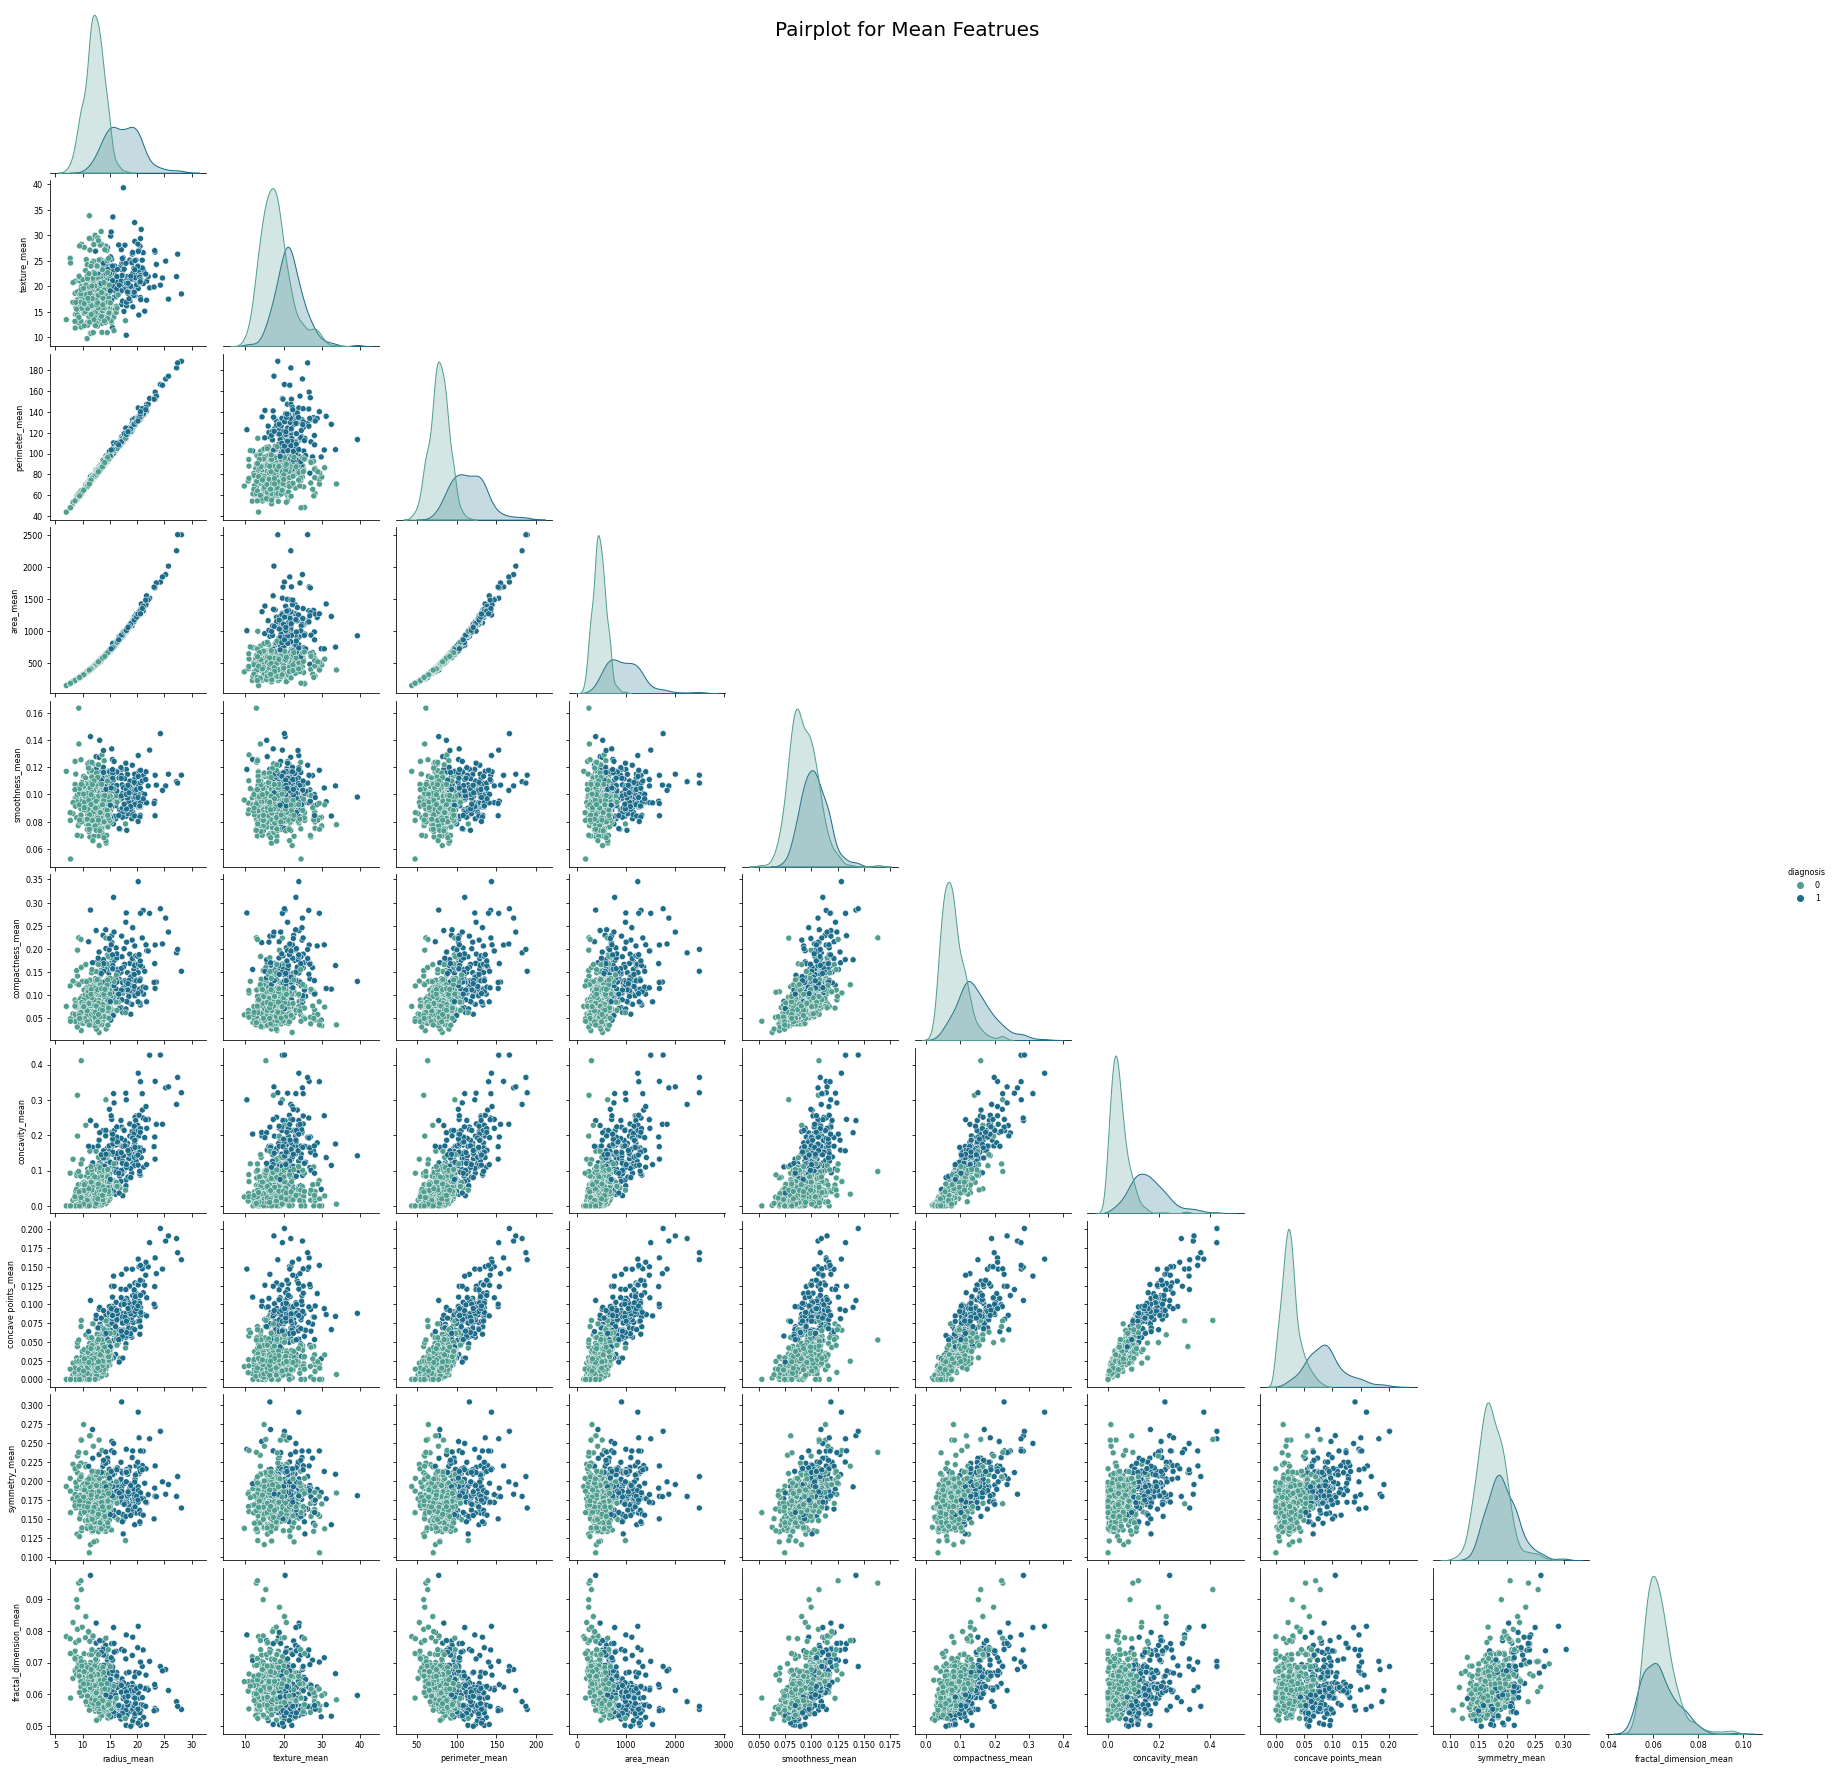

In [52]:
#Checking Multicollinearity Between Distinct Features:
def pairplot(dfx):
    import seaborn as sns
    name = str([x for x in globals() if globals()[x] is dfx][0])
    if name == 'data_mean':
        x = "Mean"
    elif name == 'data_se':
        x = "Squared Error"
    elif name == 'data_worst':
        x = "Worst"
    sns.pairplot(data=dfx, hue='diagnosis', palette='crest', corner=True).fig.suptitle('Pairplot for {} Featrues'.format(x), fontsize = 20)
pairplot(data_mean)

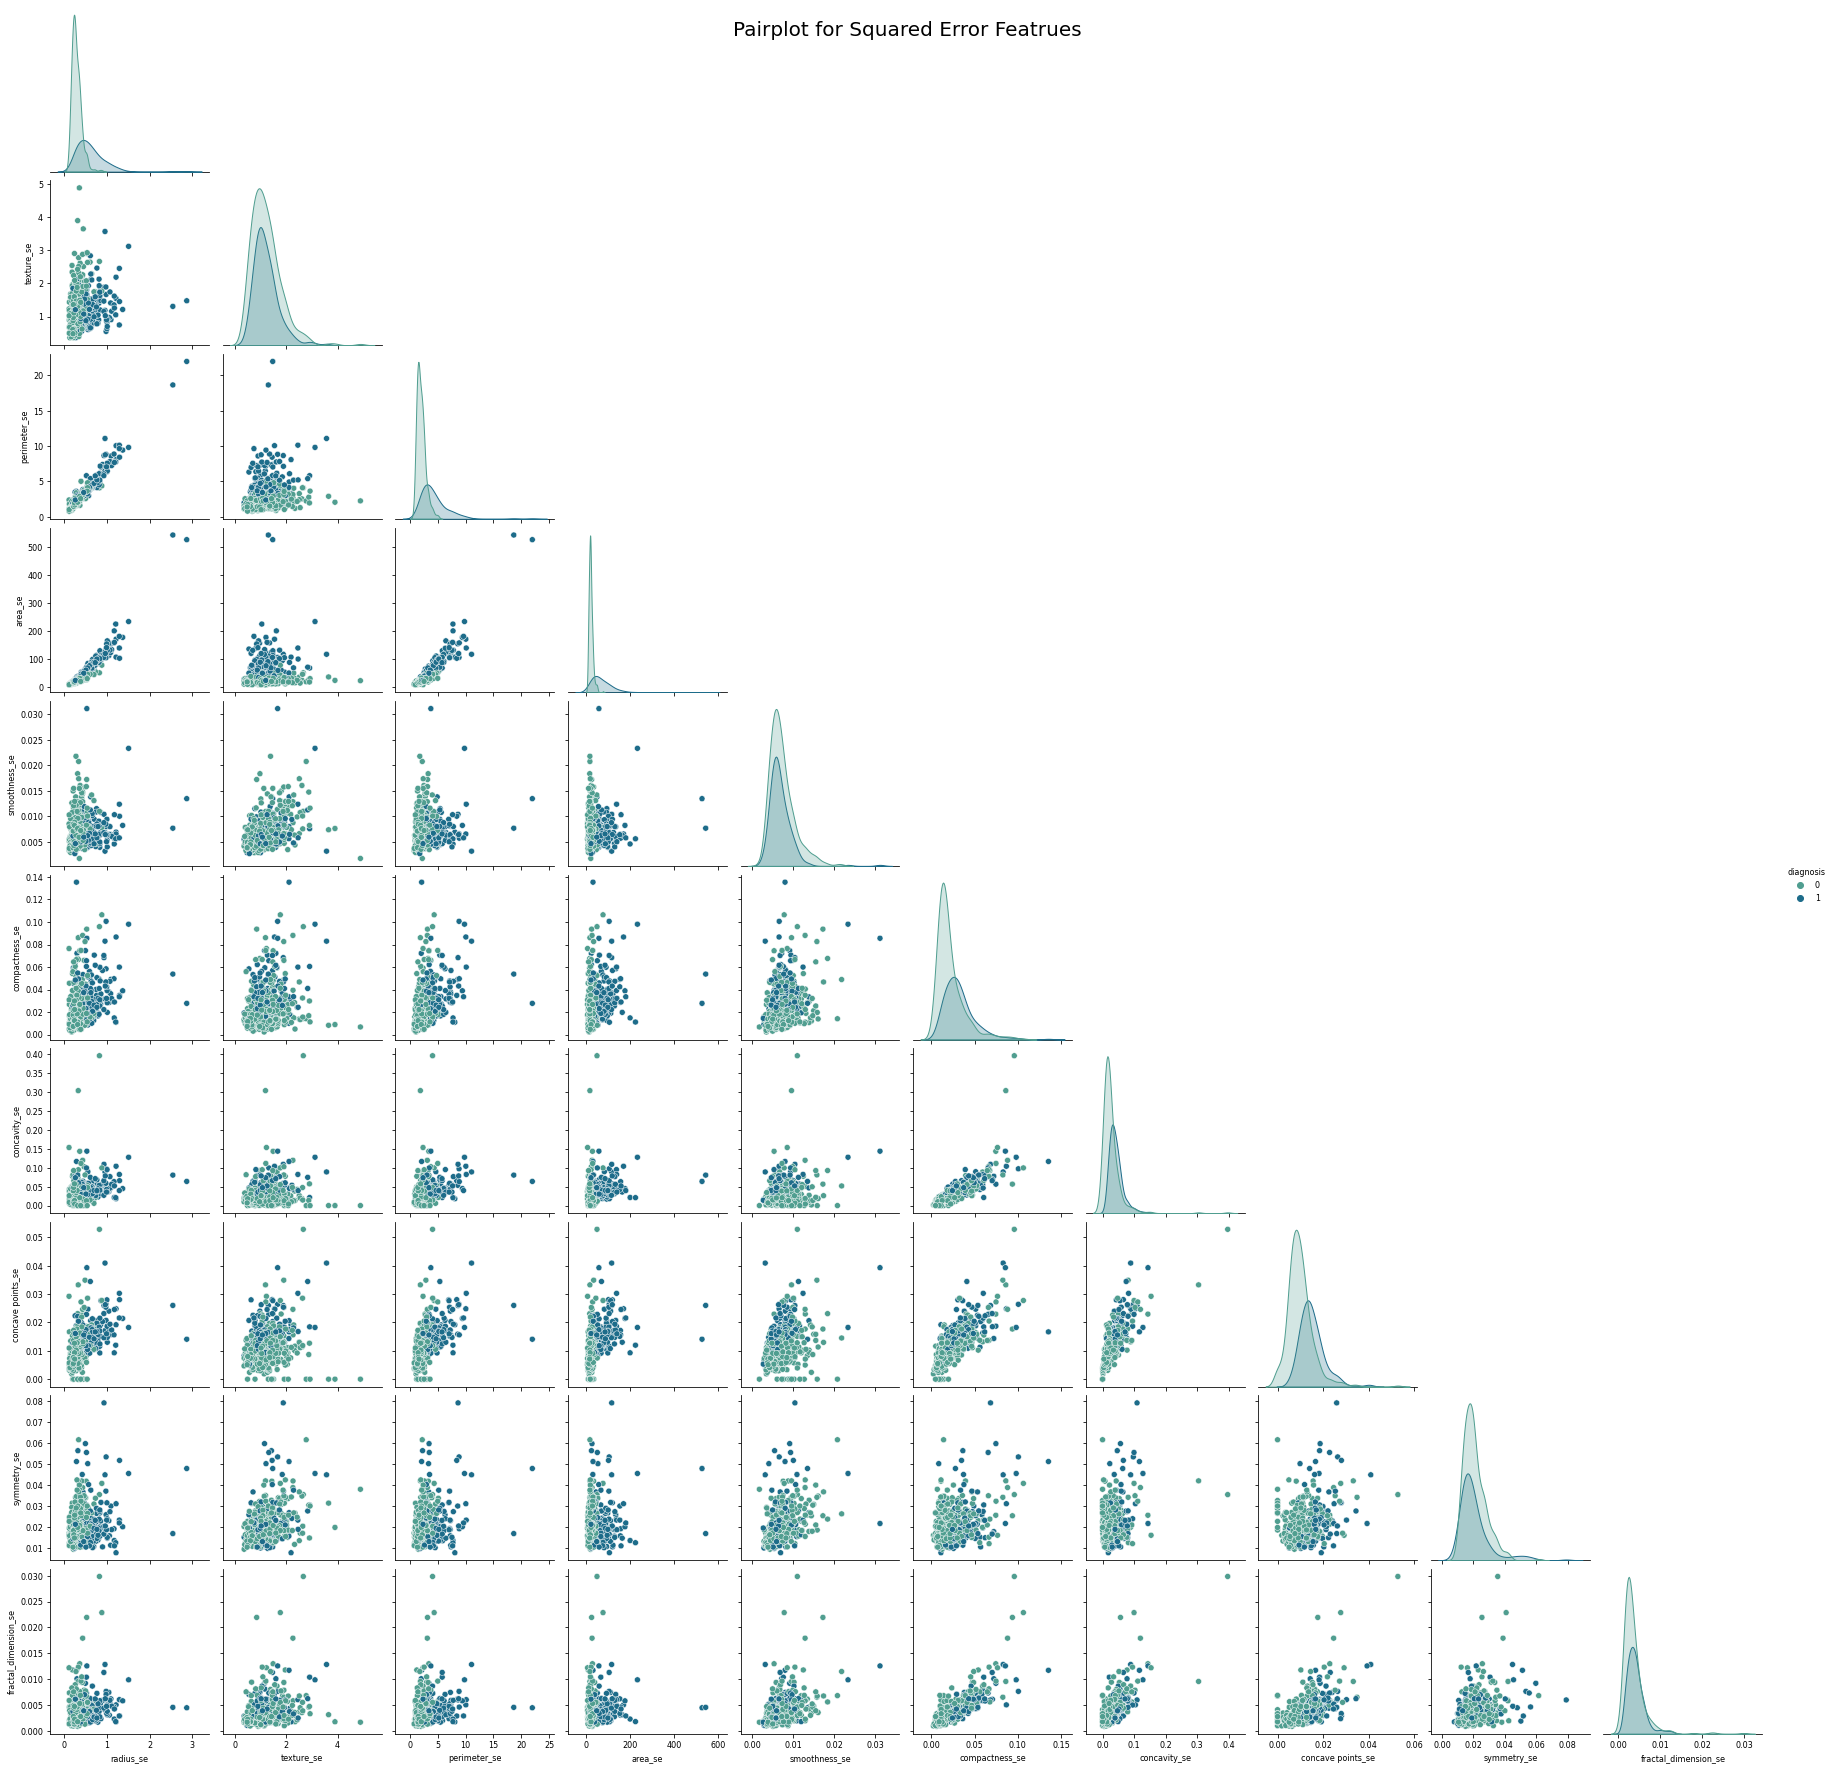

In [54]:
#Squared Error Features:
pairplot(data_se)

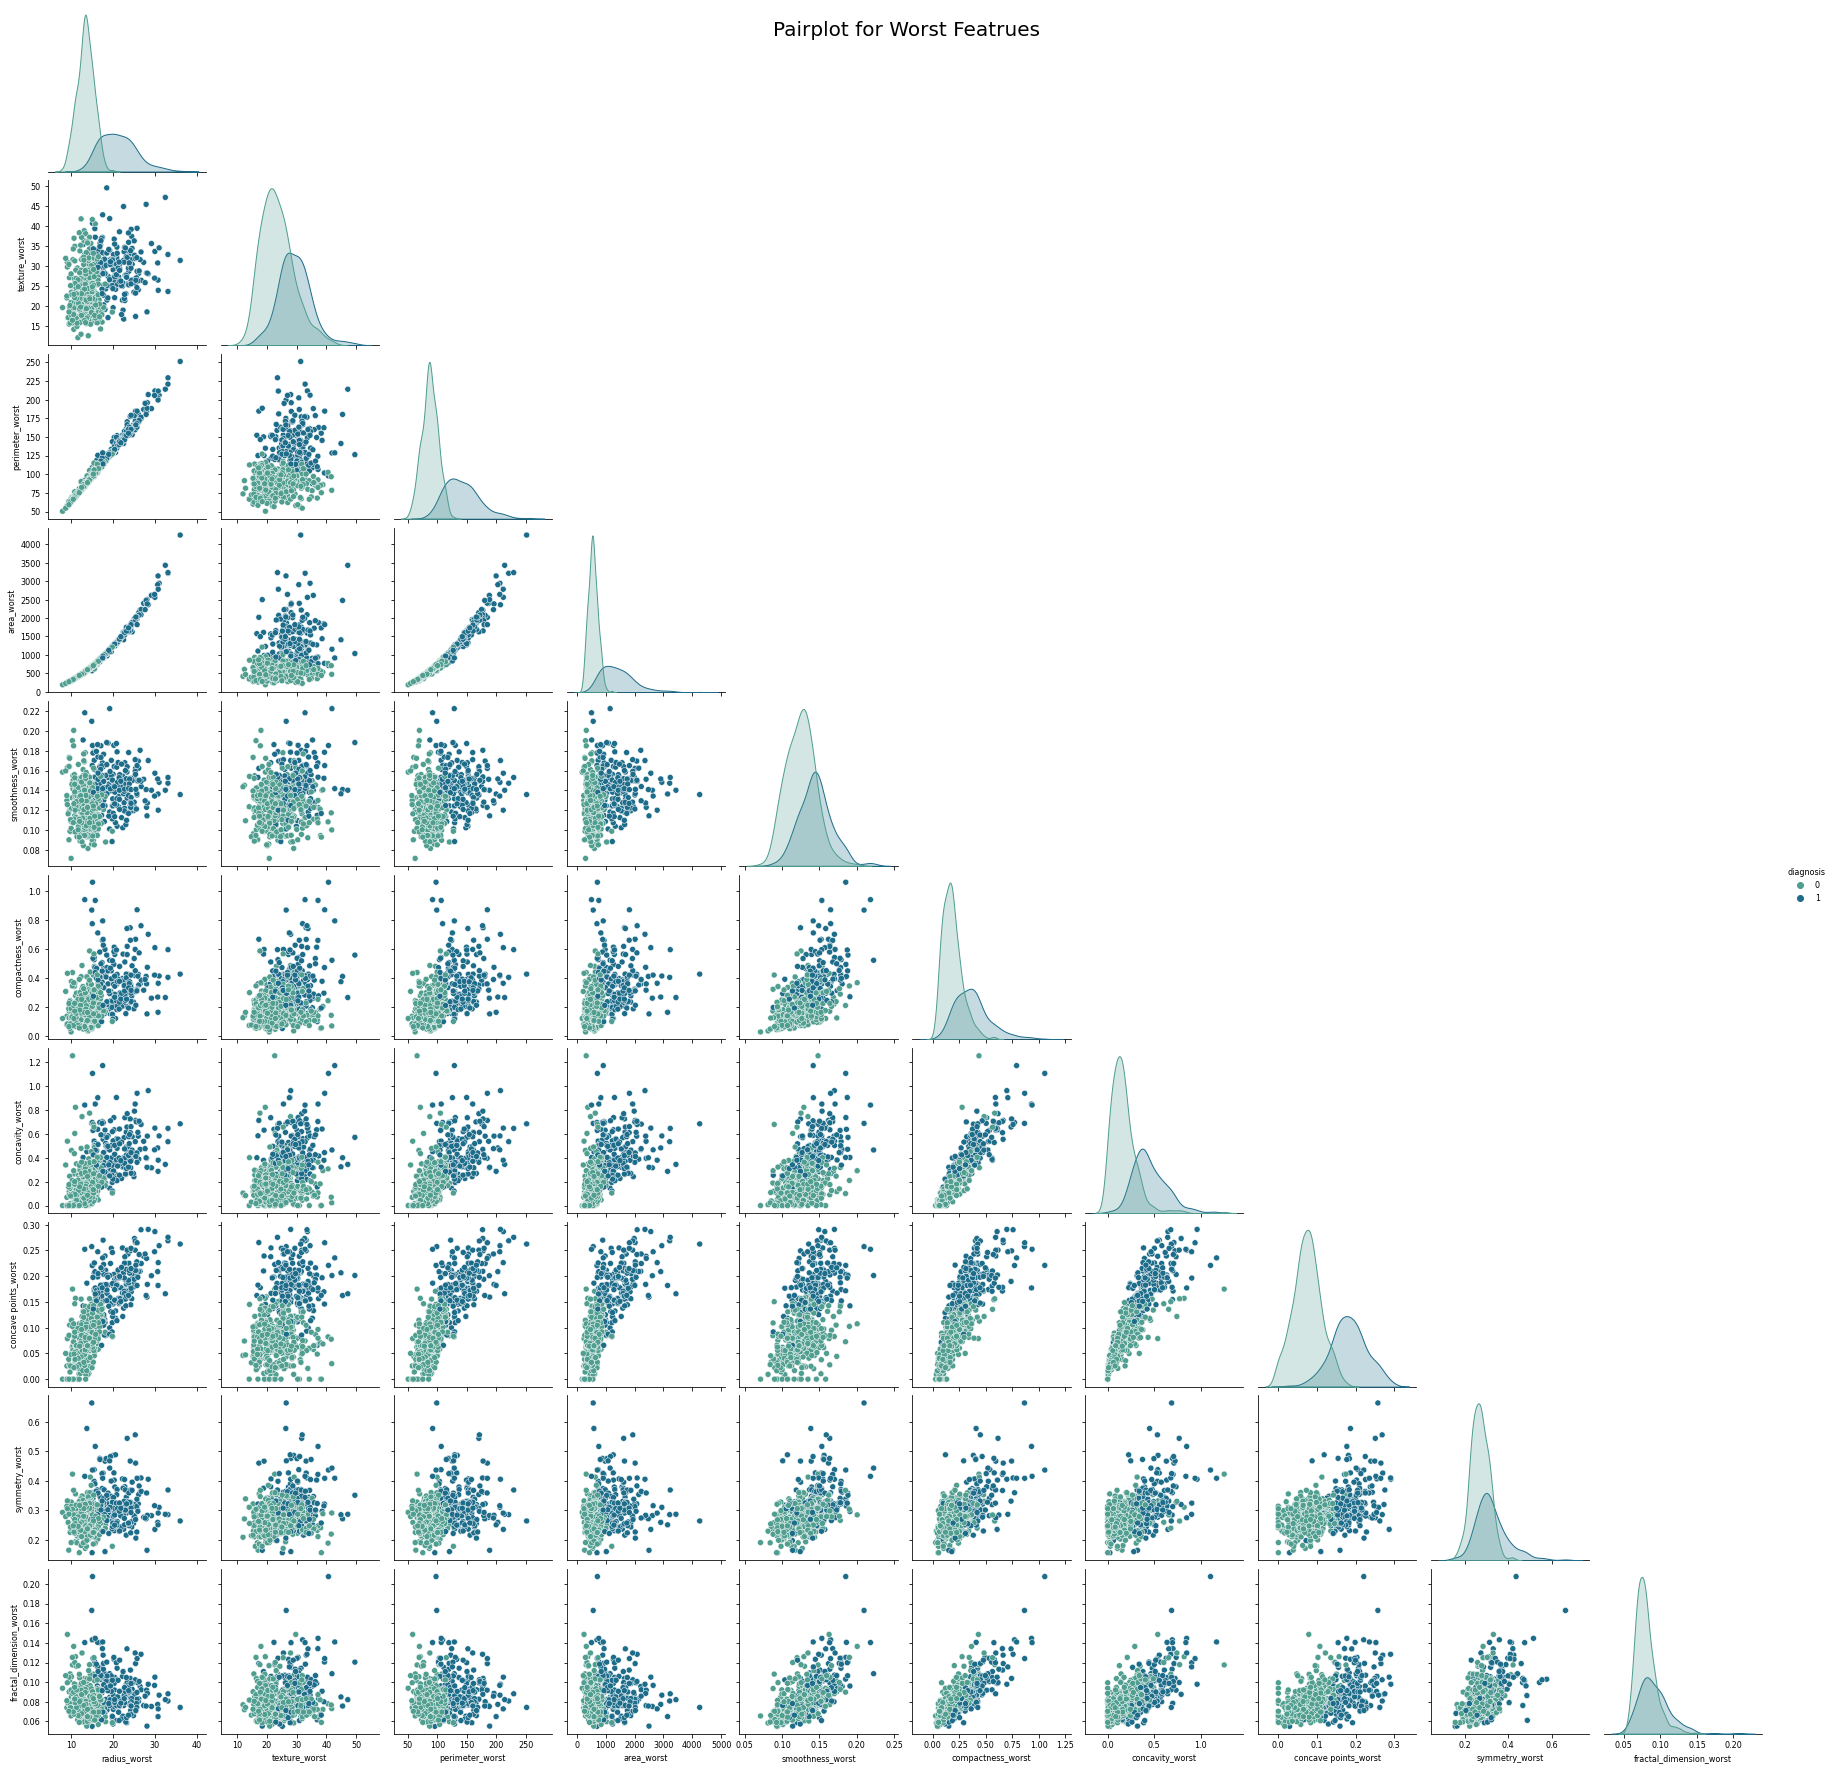

In [55]:
#Worst Features:
pairplot(data_worst)

>Almost perfectly linear patterns between the radius, perimeter, and area attributes are hinting at the presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the concavity, concave_points, and compactness.

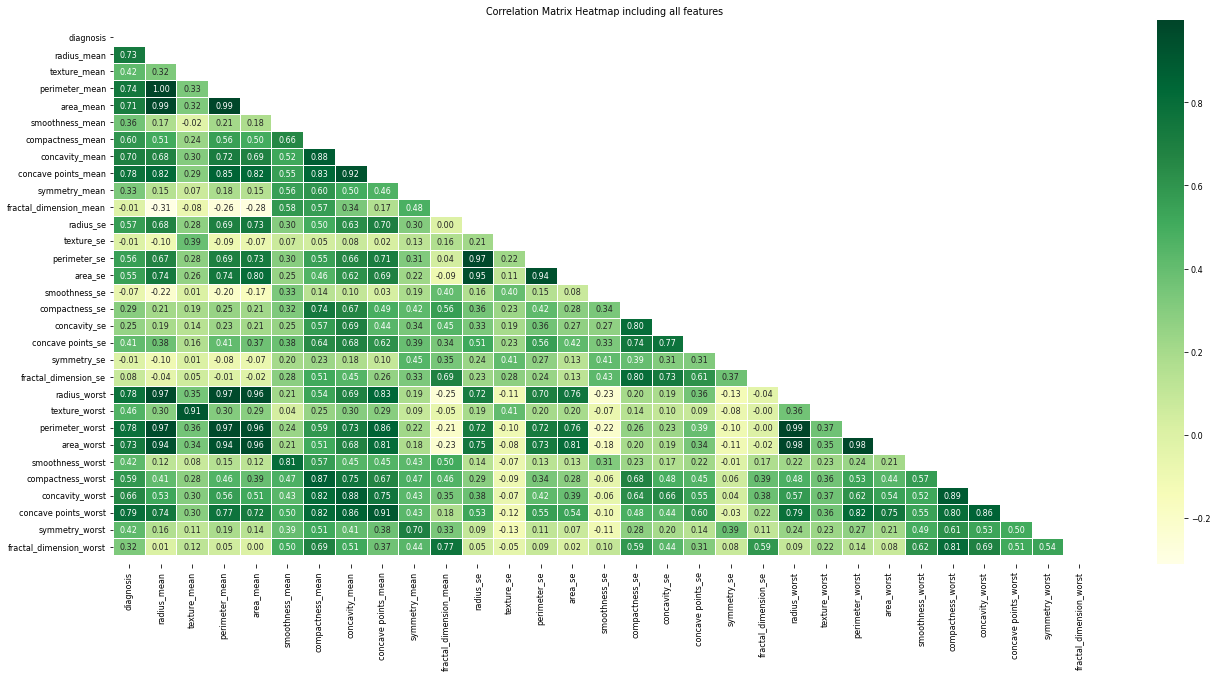

In [57]:
#Correlation Heatmap between Nucleus Feature:
corr_matrix = data.corr()  # Correlation Matrix

# Mask for Heatmap
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(corr_matrix)] = True

# Correlation Matrix Heatmap including all features
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title("Correlation Matrix Heatmap including all features");

>We can verify multicollinearity between some variables. This is because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore, we should only pick one of the three columns when we go into further analysis.

In [ ]:
Resources:
    1. https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd